# Введение
 Сегодня на практике посмотрим, как работать с категориальными признаками.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from imblearn.over_sampling import SMOTE
import itertools
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import time

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



Начнем, как всегда со знакомства с данными. Перед нами датасет «Перепись доходов». Извлечение данных было выполнено Барри Беккером из базы данных переписи населения 1994 года.
https://archive.ics.uci.edu/dataset/2/adult

In [77]:
! wget https://raw.githubusercontent.com/RShoose/Data/main/adult.csv

--2024-12-15 19:29:02--  https://raw.githubusercontent.com/RShoose/Data/main/adult.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5326368 (5.1M) [text/plain]
Saving to: ‘adult.csv’

adult.csv           100%[===================>]   5.08M  --.-KB/s    in 0.1s    

2024-12-15 19:29:03 (53.4 MB/s) - ‘adult.csv’ saved [5326368/5326368]



In [78]:
data = pd.read_csv('/content/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Выведем всю информацию о признаках

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


1. age  - числовой (int64). Возраст человека. Это числовой непрерывный признак.

2. workclass - категориальный (object). Тип занятости или класс работы человека (например, "Государственная служба", "Частный бизнес", "Безработный").

3. fnlwgt (final weight) - числовой (int64). Вес записи, показывающий, насколько данная запись представлена в общей популяции. Применяется для корректировки смещений при анализе выборки.

4. education - категориальный (object).Уровень образования человека (например, "Средняя школа", "Бакалавриат").

5. educational-num - числовой (int64). Числовая репрезентация уровня образования.

6. marital-status - категориальный (object). Семейное положение человека (например, "Женат", "Никогда не был женат").

7. occupation - категориальный (object). Род занятий (например, "Рабочий", "Менеджер").

8. relationship - категориальный (object). Тип отношений человека в семье (например, "Жена", "Муж", "Не состоит в сложных отношениях").

9. race - категориальный (object). Расовая принадлежность человека.

10. gender - категориальный (object) .Гендерная принадлежность человека ("Мужчина" или "Женщина").

11. capital-gain - числовой (int64). Прибыль от капитала (например, продажи активов), не включающая заработную плату.

12. capital-loss - числовой (int64).Потери капитала (например, убытки при продаже активов).

13. hours-per-week - числовой (int64).Сколько часов человек работает в неделю.

14. native-country - категориальный (object). Родная страна человека или страна его рождения.

15. income - категориальный (object). Целевой признак. Указывает уровень доход

Сделаем выборку по категориальным признакам

In [80]:
# выборка категориальных признаков
categorical_columns = data.select_dtypes(include=['object']).columns

# получаем датафрейм с только категориальными признаками
categorical_data = data[categorical_columns]

# выводим названия категориальных признаков
print("Категориальные признаки:")
print(categorical_columns)

Категориальные признаки:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


Начнем наши исследования с признака, который можно считать целевым. На основании этого датасета мы можем создать модель, которая будет предсказывать доход.

Первым делом познакомимся с распределением данного признака.

In [81]:
categorical_data.income.value_counts()

,count
income,
<=50K,37155
>50K,11687


Видим, что у нас 2 категории. Для бинарного кодирования признака "income", где значения представлены как "<=50K" и ">50K", можно использовать следующую логику:

- заменить "<=50K" на `0`
- заменить ">50K" на `1`

In [82]:
categorical_data['income'] = categorical_data['income'].map({'<=50K': 0, '>50K': 1})

Проверим соответствует ли распределение

In [83]:
categorical_data.income.value_counts()

,count
income,
0,37155
1,11687


In [84]:
categorical_data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,0


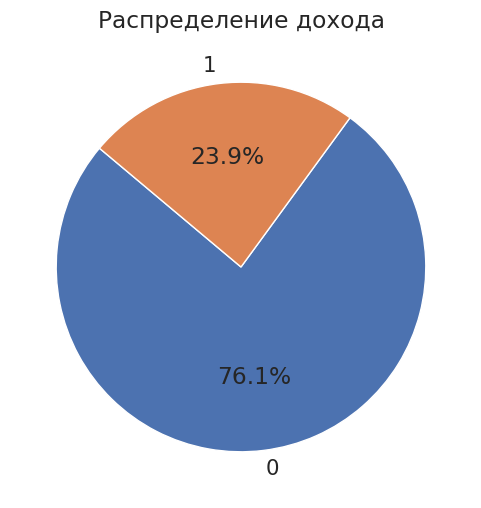

In [85]:
# распределение данных из value_counts() (пример)
income_counts = categorical_data['income'].value_counts()  # Подсчёт количества категорий

# названия категорий и их значения
labels = income_counts.index  # индексы распределения ('<=50K', '>50K')
sizes = income_counts.values  # значения

# построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Распределение дохода')
plt.show()


- `<=50K`: количество записей, где доход меньше либо равен 50K, составляет 37,155.  
- `>50K`: количество записей, где доход превышает 50K, составляет 11,687.

   - Данные демонстрируют дисбаланс между двумя категориями: большинство (около 76.1%) принадлежит классу `<=50K`, и меньшинство (около 23.9%) принадлежит классу `>50K`.

Возьмем следующий признак

In [86]:
categorical_data['native-country'].value_counts()

,count
native-country,
United-States,43832
Mexico,951
?,857
Philippines,295
Germany,206
Puerto-Rico,184
Canada,182
El-Salvador,155
India,151


Для кодирования категориального признака, такого как `native-country`, существует несколько подходов. Выбор метода зависит от задачи.
- Можно использовать Label Encoding (Порядковое кодирование, при отсутствии смысла порядка)
Любая страна получает уникальный числовой код. Этот метод полезен для алгоритмов, которые могут работать с порядковыми переменными или требуют компактного представления (например, деревья решений).Но алгоритмы могут ошибочно интерпретировать числовой код как ранговую (порядковую) информацию, что неверно.

Frequency Encoding (Частотное кодирование)
Этот метод заменяет категориальные значения на частоты их появления в данных. Например, `United-States` будет кодирован как `0.89`, `Mexico` как `0.019`, и так далее.

In [87]:
freq_encoding = categorical_data['native-country'].value_counts() / len(categorical_data)
categorical_data['native-country_freq'] = categorical_data['native-country'].map(freq_encoding)

In [88]:
categorical_data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,native-country_freq
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0,0.897424
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0,0.897424
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1,0.897424
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1,0.897424
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,0,0.897424


Плюсы:
- сохраняется соотношение важности категорий.
- компактное представление (и числовое значение совместимо с большинством моделей).

Минусы:
- может утратить смысл при большом количестве категорий или сильном дисбалансе.

**Target Encoding (Целевое кодирование)**
Используется только для случаев, когда вы пытаетесь предсказать целевую переменную (например, `income`). Заменяются значения `native-country` среднего значения целевой переменной (например, доля доходов выше `>50K`).

In [89]:
target_mean = categorical_data.groupby('native-country')['income'].mean()
categorical_data['native-country_target'] = categorical_data['native-country'].map(target_mean)

In [90]:
categorical_data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,native-country_freq,native-country_target
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0,0.897424,0.243977
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0,0.897424,0.243977
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1,0.897424,0.243977
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1,0.897424,0.243977
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,0,0.897424,0.243977


Плюсы:
- сохраняется информация о связи между категорией и целевой переменной.
- часто улучшает производительность моделей.

Минусы:
- возможен утечка данных (когорта `native-country` уже влияет на целевую переменную).


Либо можно оставить только популярные страны (`United States`, `Mexico`, `Philippines`, `Germany`, `Puerto Rico`, `Canada`) как отдельные категории. Остальные заменить как `Other`.Применить One-Hot Encoding к обновлённым категориям.

In [91]:
top_countries = list(categorical_data['native-country'].value_counts().index)[:20]
top_countries

['United-States',
 'Mexico',
 '?',
 'Philippines',
 'Germany',
 'Puerto-Rico',
 'Canada',
 'El-Salvador',
 'India',
 'Cuba',
 'England',
 'China',
 'South',
 'Jamaica',
 'Italy',
 'Dominican-Republic',
 'Japan',
 'Guatemala',
 'Poland',
 'Vietnam']

In [92]:
# объединение редких категорий
categorical_data['native-country'] = categorical_data['native-country'].apply(lambda x: x if x in top_countries else 'Other')

encoder = OneHotEncoder(sparse_output=False)

# преобразуем данные
encoded_array = encoder.fit_transform(categorical_data[['native-country']] )

# конвертируем матрицу numpy в DataFrame для удобства
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['native-country']))


In [93]:
encoded_df

,native-country_?,native-country_Canada,native-country_China,native-country_Cuba,native-country_Dominican-Republic,native-country_El-Salvador,native-country_England,native-country_Germany,native-country_Guatemala,native-country_India,...,native-country_Jamaica,native-country_Japan,native-country_Mexico,native-country_Other,native-country_Philippines,native-country_Poland,native-country_Puerto-Rico,native-country_South,native-country_United-States,native-country_Vietnam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [94]:
result = pd.concat([categorical_data, encoded_df], axis=1)
result

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,native-country_freq,...,native-country_Jamaica,native-country_Japan,native-country_Mexico,native-country_Other,native-country_Philippines,native-country_Poland,native-country_Puerto-Rico,native-country_South,native-country_United-States,native-country_Vietnam
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0,0.897424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0,0.897424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1,0.897424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1,0.897424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,0,0.897424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0,0.897424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1,0.897424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,0,0.897424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,0,0.897424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
categorical_data.workclass.value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


Сначала нужно обработать пропуски (значение `?`), так как они мешают моделям.
Варианты:
- заменить `?` на значение `"Unknown"`.
- заменить на наиболее частую категорию (`Private`, так как у нее самое большое количество).  
Мы заменим на `"Unknown"`

In [96]:
categorical_data['workclass'] = categorical_data['workclass'].replace('?', 'Unknown')

 `Binary Encoding (расширенный)`  
Если уникальных значений очень много, можно закодировать каждый как бинарное число и создать несколько столбцов. Для этого подойдет библиотека `category_encoders`:

In [97]:
! pip install category_encoders

In [98]:
from category_encoders import BinaryEncoder

encoder = BinaryEncoder(cols=['workclass'])
binary_encoded = encoder.fit_transform(categorical_data['workclass'])
result = pd.concat([categorical_data, binary_encoded], axis=1)
result

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,native-country_freq,native-country_target,workclass_0,workclass_1,workclass_2,workclass_3
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0,0.897424,0.243977,0,0,0,1
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0,0.897424,0.243977,0,0,0,1
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1,0.897424,0.243977,0,0,1,0
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1,0.897424,0.243977,0,0,0,1
4,Unknown,Some-college,Never-married,?,Own-child,White,Female,United-States,0,0.897424,0.243977,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0,0.897424,0.243977,0,0,0,1
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1,0.897424,0.243977,0,0,0,1
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,0,0.897424,0.243977,0,0,0,1
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,0,0.897424,0.243977,0,0,0,1


In [99]:
binary_encoded

,workclass_0,workclass_1,workclass_2,workclass_3
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,1,1
...,...,...,...,...
48837,0,0,0,1
48838,0,0,0,1
48839,0,0,0,1
48840,0,0,0,1


`BinaryEncoder` – это метод кодирования категориальных признаков, который преобразует значения категорий в двоичное представление (бинарный вид) и раскладывает их по разрядам в бинарных столбцах. Этот метод является компромиссом между One-Hot Encoding и Label Encoding, особенно если вы работаете с множеством категорийных переменных.


1. Категории преобразуются в числовые метки (Label Encoding):
   - Присваивается уникальный числовой идентификатор каждой категории. Например:
     - Private → 1
     - Self-emp-not-inc → 2
     - Local-gov → 3

2. Числовые метки переводятся в двоичное (binary) представление:
   - 1 → 01
   - 2 → 10
   - 3 → 11

3. Разбиваем бинарное представление на разряды по колоночным значениям ("битам"):
   - Разряд 1 → перезаписывается в отдельный столбец
   - Разряд 2 → записывается в другой столбец
   - и так далее для всех битов.

В итоге оригинальный признак `'workclass'` превращается в несколько бинарных столбцов (по числу битов, необходимых для кодирования максимального числа).

Каждая бинарная колонка представляет собой бит из двоичного представления чисел категорий:

- Если в таблице есть `n` уникальных категорий, количество сгенерированных бинарных столбцов будет равно количеству разрядов в бинарной форме числа `n-1` (то есть целая часть от `log2(n)` + 1).
- Например, для 3 категорий (`Private`, `Self-emp-not-inc`, `Local-gov`) требуется 2 бинарных столбца, потому что
.

В этом признаке все достаточно просто, категорий мало, поэтому, можно использовать LabelEncoder

In [100]:
categorical_data.gender.value_counts()

,count
gender,
Male,32650
Female,16192


In [101]:
encoder = LabelEncoder()
categorical_data['gender'] = encoder.fit_transform(categorical_data['gender'])

In [102]:
categorical_data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,native-country_freq,native-country_target
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,1,United-States,0,0.897424,0.243977
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,1,United-States,0,0.897424,0.243977
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,1,United-States,1,0.897424,0.243977
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,United-States,1,0.897424,0.243977
4,Unknown,Some-college,Never-married,?,Own-child,White,0,United-States,0,0.897424,0.243977


In [103]:
categorical_data.race.value_counts()

,count
race,
White,41762
Black,4685
Asian-Pac-Islander,1519
Amer-Indian-Eskimo,470
Other,406


Категорий мало, поэтому, применим OneHot Encoding

In [108]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(categorical_data[['race']])

In [110]:
encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['race']))

In [111]:
result = pd.concat([categorical_data, encoded_df], axis=1)
result

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income,native-country_freq,native-country_target,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,1,United-States,0,0.897424,0.243977,0.0,0.0,1.0,0.0,0.0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,1,United-States,0,0.897424,0.243977,0.0,0.0,0.0,0.0,1.0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,1,United-States,1,0.897424,0.243977,0.0,0.0,0.0,0.0,1.0
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,United-States,1,0.897424,0.243977,0.0,0.0,1.0,0.0,0.0
4,Unknown,Some-college,Never-married,?,Own-child,White,0,United-States,0,0.897424,0.243977,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,0,United-States,0,0.897424,0.243977,0.0,0.0,0.0,0.0,1.0
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,1,United-States,1,0.897424,0.243977,0.0,0.0,0.0,0.0,1.0
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,0,United-States,0,0.897424,0.243977,0.0,0.0,0.0,0.0,1.0
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,1,United-States,0,0.897424,0.243977,0.0,0.0,0.0,0.0,1.0


# Самостоятельно

Попробуйте поработать с признаками `education`, `marital-status`,	`occupation`. Проанализируйте их распределение и примите решение, как их можно закодировать.

# Стандартизация и нормализация

Обратимся  к другим данным, в которых значения сильно отличаются

In [112]:
! wget https://raw.githubusercontent.com/RShoose/Data/main/heart.csv

--2024-12-15 19:41:54--  https://raw.githubusercontent.com/RShoose/Data/main/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2024-12-15 19:41:54 (89.8 MB/s) - ‘heart.csv’ saved [11328/11328]



In [113]:
heart_disease_data=pd.read_csv('heart.csv')

In [114]:
heart_disease_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [118]:
heart_disease_data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [115]:
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [116]:
features = heart_disease_data.columns

Давайте посмотрим на влияние разных подходов на распределение признаков.

1. **Применим три метода нормализации/стандартизации: `StandardScaler`, `MinMaxScaler`, `RobustScaler`.**
2. Сохраним результаты в отдельных датасетах.
3. Визуализируем изменения в распределении данных.
4. Подробнее остановимся на работе каждого метода, особенно подробно работу `RobustScaler`.






1.    **`StandardScaler`:**
   - **Описание**: преобразует данные таким образом, что их среднее значение становится равным 0, а стандартное отклонение — равным 1. Формула для стандартизации:
$$Z = \frac{X - \mu}{\sigma}$$
     
     где $X$ — исходное значение,   
     $\ mu$ — среднее значение,  
     $ \sigma $ — стандартное отклонение.  

   - **Когда использовать**: подходит для распределений, близких к нормальным. Особенно применим в линейных моделях и методах, которые зависят от корреляции признаков.
   - **Недостатки**: чувствителен к выбросам (outliers), так как они сильно влияют на расчет среднего значения и стандартного отклонения.

In [119]:
# применение StandardScaler
standard_scaler = StandardScaler()
data_standardscaled = pd.DataFrame(
    standard_scaler.fit_transform(heart_disease_data),
    columns=heart_disease_data.columns
)

2. **`MinMaxScaler`:**
   - **Описание**: нормализует данные в указанный диапазон (по умолчанию $[0, 1]$). Формула:  
$$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$
   - **Когда использовать**: полезно, когда необходимо нормализовать данные в единый масштаб (например, для нейронных сетей). Удобен при равномерном распределении данных.
   - **Недостатки**: чувствителен к выбросам, так как $ X_{\text{max}}$ и $ X_{\text{min}} $ сильно изменяются из-за них.

In [120]:
# применение MinMaxScaler
minmax_scaler = MinMaxScaler()
data_minmaxscaled = pd.DataFrame(
    minmax_scaler.fit_transform(heart_disease_data),
    columns=heart_disease_data.columns
)

3. **`RobustScaler`:**
   - **Описание**: Этот метод масштабирования также используется для нормализации, но основывается на устойчивых параметрах (медиана и межквартильный размах), чтобы уменьшить влияние выбросов. Формула:
$$
X_{\text{scaled}} = \frac{X - \text{Median}(X)}{\text{IQR}}
$$
  где $\text{IQR}$ — интерквартильный размах $(75^{\text{й}} \%$ - $25^{\text{й}} \% $).
   - **Когда использовать**: Хорошо работает с данными, содержащими выбросы. Например, если значения некоторых признаков значительно отклоняются от общей массы, они не будут сильно влиять на масштабирование.
   - **Преимущества**:
     - устойчив к выбросам.
     - сохраняет распределение большинства данных.
   - **Недостатки**: не гарантируется приведение данных к фиксированному диапазону, как в случае `MinMaxScaler`. Например, большинство значений может находиться внутри диапазона от -1 до 1, но не все.


In [121]:
from sklearn.preprocessing import  RobustScaler
# применение RobustScaler
robust_scaler = RobustScaler()
data_robustscaled = pd.DataFrame(
    robust_scaler.fit_transform(heart_disease_data),
    columns=heart_disease_data.columns
)

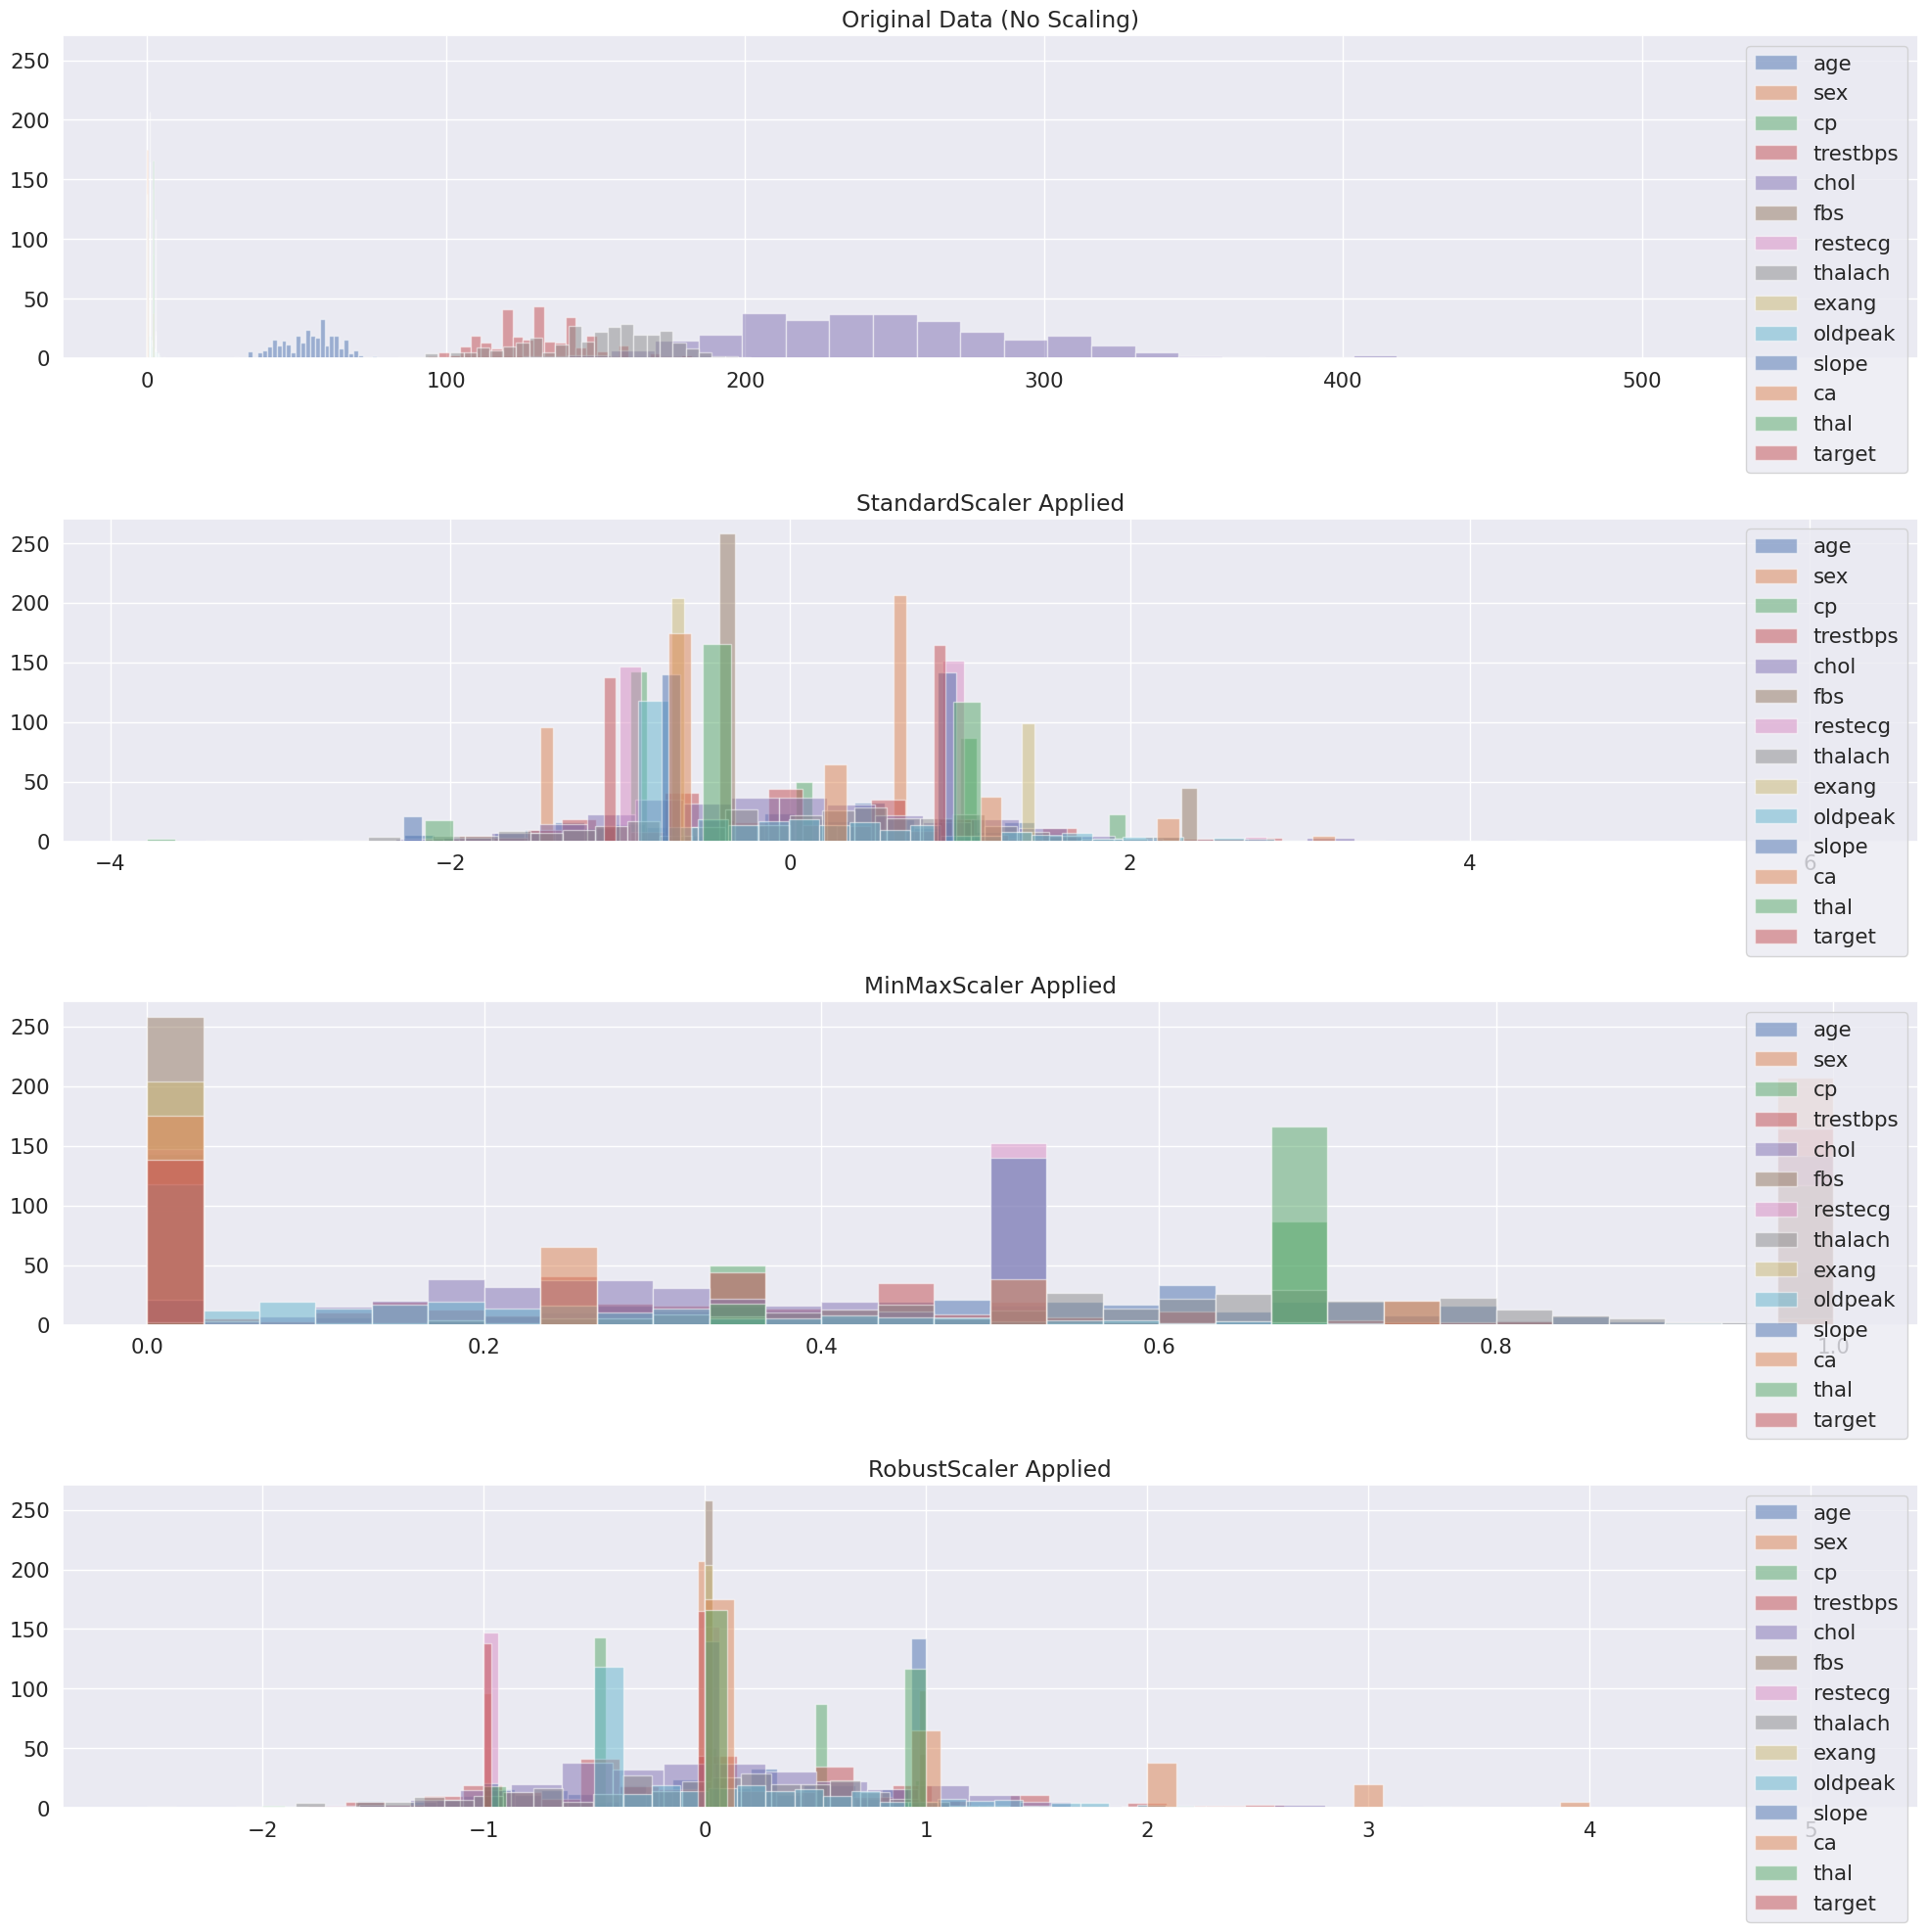

In [123]:
# визуализация распределений: до и после применений скейлов
plt.figure(figsize=(20, 20))

# исходные данные
plt.subplot(4, 1, 1)
plt.title('Оригинальные данные')
for column in heart_disease_data.columns:
    plt.hist(heart_disease_data[column], bins=30, alpha=0.5, label=column)
plt.legend(loc='upper right')

# StandardScaler
plt.subplot(4, 1, 2)
plt.title('StandardScaler')
for column in data_standardscaled.columns:
    plt.hist(data_standardscaled[column], bins=30, alpha=0.5, label=column)
plt.legend(loc='upper right')

# MinMaxScaler
plt.subplot(4, 1, 3)
plt.title('MinMaxScaler')
for column in data_minmaxscaled.columns:
    plt.hist(data_minmaxscaled[column], bins=30, alpha=0.5, label=column)
plt.legend(loc='upper right')

# RobustScaler
plt.subplot(4, 1, 4)
plt.title('RobustScaler')
for column in data_robustscaled.columns:
    plt.hist(data_robustscaled[column], bins=30, alpha=0.5, label=column)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


---

### Результаты визуализации:
Обратите внимание на различия:
- **`StandardScaler`** делает распределение "центрированным", но выбросы по-прежнему заметны.
- **`MinMaxScaler`** уменьшает все данные строго в диапазон \([0, 1]\), но выбросы вытягивают крайние значения.
- **`RobustScaler`** показывает более устойчивую трансформацию в присутствии выбросов. Распределение остается менее искаженным, чем в предыдущих методах.